In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score

from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Alghoritms_and_Data/transformed_df.csv')
data = data.drop('Unnamed: 0', axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,gap
0,1.380152,-1.396790,1.138701,-0.623697,-1.355643,-0.229753,-0.820006,-0.558946,0.884561,0.440781,...,0.135974,0.131545,0.083316,-0.302492,-0.215202,-0.309829,0.193556,-0.072166,-0.028544,0.2048
1,-1.065703,-1.030798,0.169913,-0.661183,1.004171,0.433279,-0.314339,0.070277,0.377711,0.436077,...,-0.087863,-0.052102,-0.126836,0.134485,-0.134111,-0.041188,-0.066734,-0.117492,-0.032189,0.2091
2,-1.006439,-0.661170,-0.491330,-0.721637,-0.914620,1.018894,-0.500122,0.954780,-0.945301,-0.410209,...,0.039562,0.035099,-0.281481,0.027908,0.260281,-0.018476,0.029018,-0.040180,0.089014,0.2215
3,-0.935284,-1.524245,0.789035,-0.636435,-0.757559,0.669952,-0.347897,-0.335254,0.677201,0.103433,...,0.061798,0.103567,0.129725,0.129292,0.146679,-0.043799,0.022157,-0.039542,0.046371,0.2066
4,-0.771928,-0.356625,-0.328355,1.270920,-0.391627,-0.848272,-0.058318,0.116577,0.533072,-0.619930,...,0.078112,0.003992,-0.049615,-0.050855,-0.000559,0.004288,-0.065564,0.152518,0.172743,0.2569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19978,0.289431,-0.622220,1.656522,-0.605985,-1.066020,0.530498,-1.359531,-0.656393,0.696412,0.663741,...,0.167978,-0.025720,0.067494,-0.277572,-0.176632,-0.108451,-0.135686,-0.199602,0.144917,0.2127
19979,0.693489,-0.112332,0.076076,0.098001,1.266993,0.074717,0.834136,0.385235,0.896887,-0.584944,...,0.220066,0.062288,-0.176342,-0.043900,-0.158691,-0.104343,0.041672,-0.014929,-0.120703,0.2075
19980,1.622306,-0.332938,-1.226158,0.071454,-0.221010,-0.013198,-1.452157,-0.269693,-0.189780,-0.261478,...,-0.004360,-0.068835,0.069521,0.154838,-0.130064,-0.131027,0.233936,-0.008212,-0.160579,0.2416
19981,-0.120016,-0.640904,-1.410589,0.968683,-1.379739,-0.722806,0.581868,0.252234,0.736860,0.328075,...,-0.149425,-0.083600,0.032811,-0.096312,-0.054456,0.047740,-0.056402,0.085385,-0.095126,0.2937


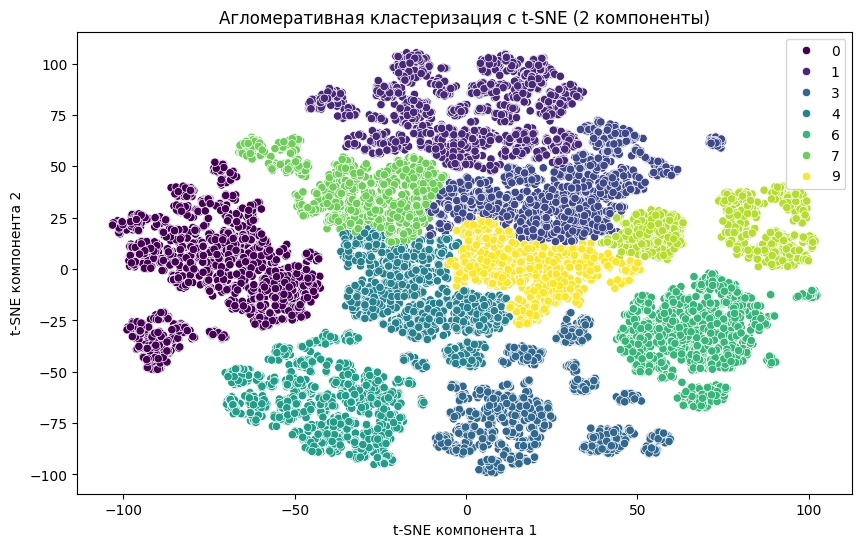

In [6]:
descriptors = pd.DataFrame()
descriptors = data.drop(columns=["gap"])

# Применяем t-SNE для снижения размерности с двумя компонентами
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(descriptors)

# Создаем экземпляр алгоритма кластеризации (агломеративный)
agglomerative = AgglomerativeClustering(n_clusters=10)
clusters = agglomerative.fit_predict(tsne_result)

# Визуализация результатов с помощью Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tsne_result[:,0], y=tsne_result[:,1], hue=clusters, palette='viridis')
plt.title('Агломеративная кластеризация с t-SNE (2 компоненты)')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.show()

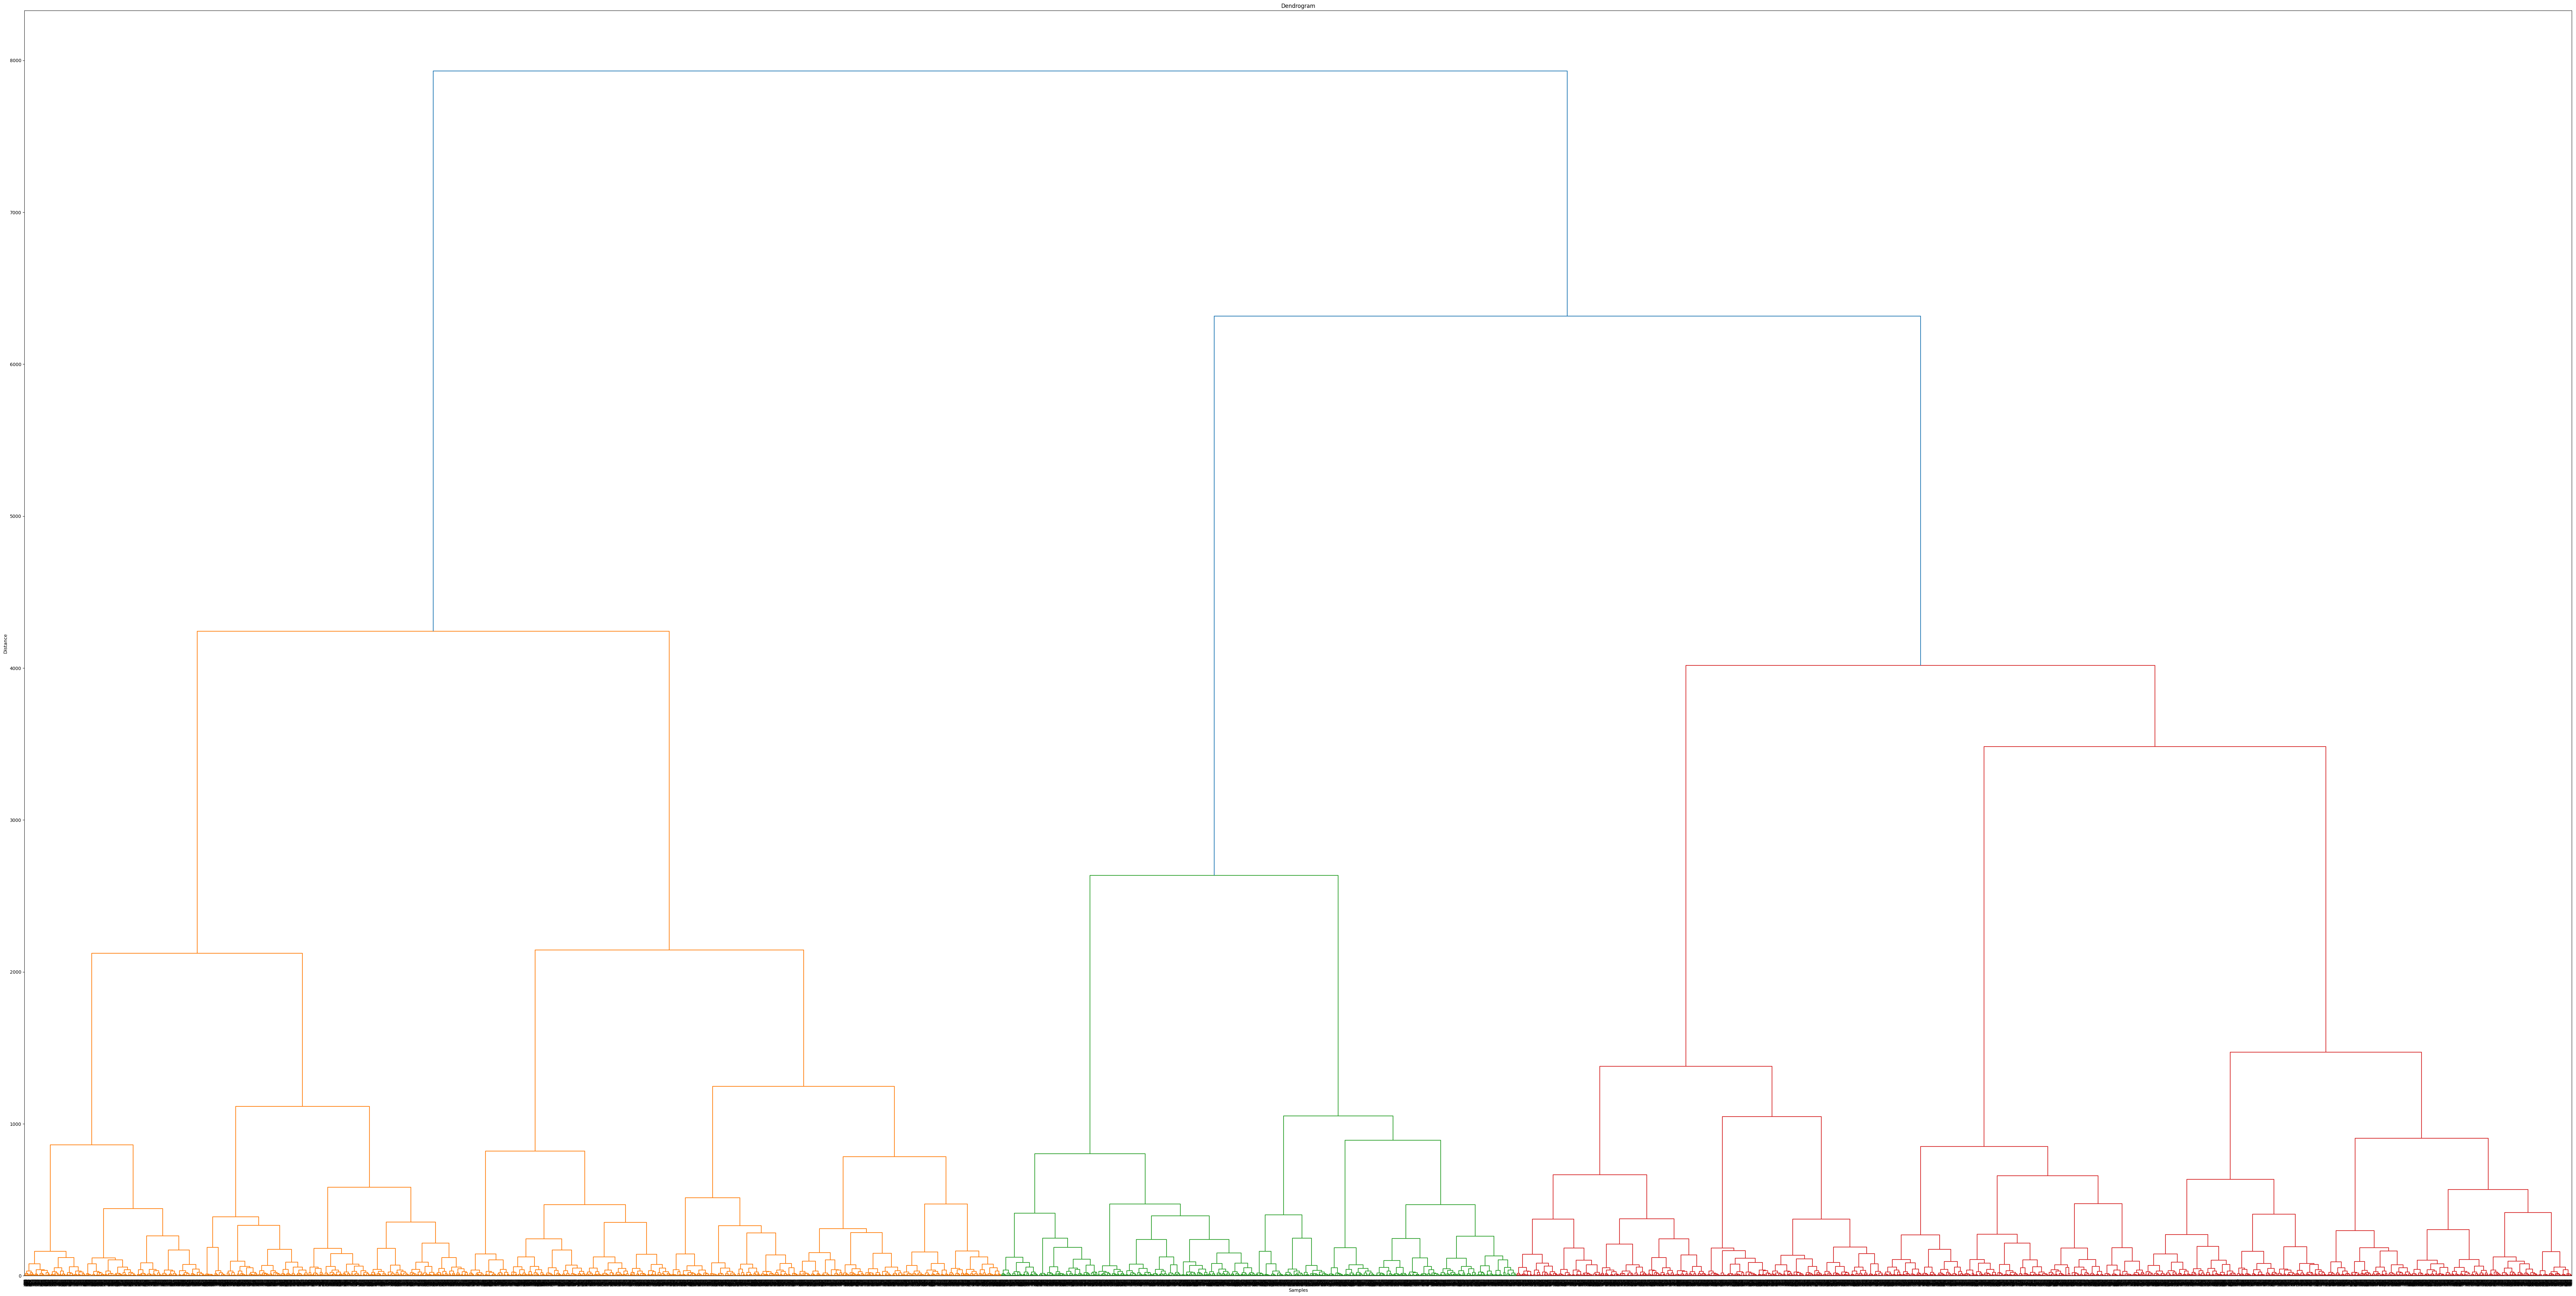

In [7]:
# Дендрограмма
# Выполнение агломеративной кластеризации
Z = linkage(tsne_result, method='ward')

# Визуализация дендрограммы
plt.figure(figsize=(100, 50))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


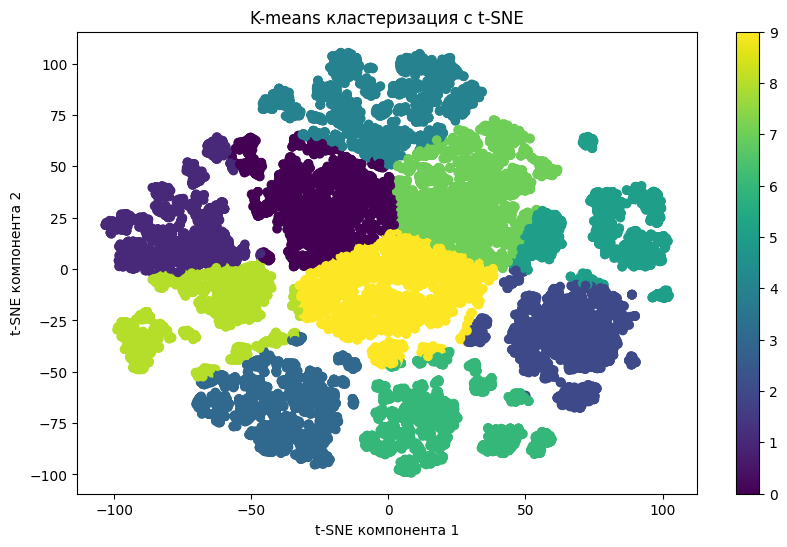

In [8]:
# Кластеризация с k-means
# Создаем экземпляр алгоритма кластеризации
kmeans = KMeans(n_clusters=10)

# Применяем кластеризацию к данным
kmeans.fit(tsne_result)
clusters = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis')
plt.title('K-means кластеризация с t-SNE')
plt.xlabel('t-SNE компонента 1')
plt.ylabel('t-SNE компонента 2')
plt.colorbar()
plt.show()

Проверка кластеризации

In [10]:
# Проверка целевой колонки
gap_column = data.iloc[:, -1]
# Квартили
quartiles = gap_column.quantile([0.25, 0.5, 0.75])

In [11]:
# Трансформация значений в последней колонке
first_quartile = quartiles.iloc[0]
second_quartile = quartiles.iloc[1]
gap_column_classes = gap_column.apply(lambda x: 0 if x < first_quartile else (1 if first_quartile < x < second_quartile else 2))

# Создание датафрейма для кластеризации
features = data.iloc[:, :-1]  # Все столбцы, кроме последнего

# Кластеризация с использованием метода KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(features)

# Проверка качества кластеризации
target_variable = data.iloc[:, -1]

# Используем Adjusted Rand Index для оценки качества кластеризации
ari_score = adjusted_rand_score(target_variable, clusters)

# Вывод результата
print("Adjusted Rand Index для кластеризации:", ari_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index для кластеризации: 0.0001882973014825662


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


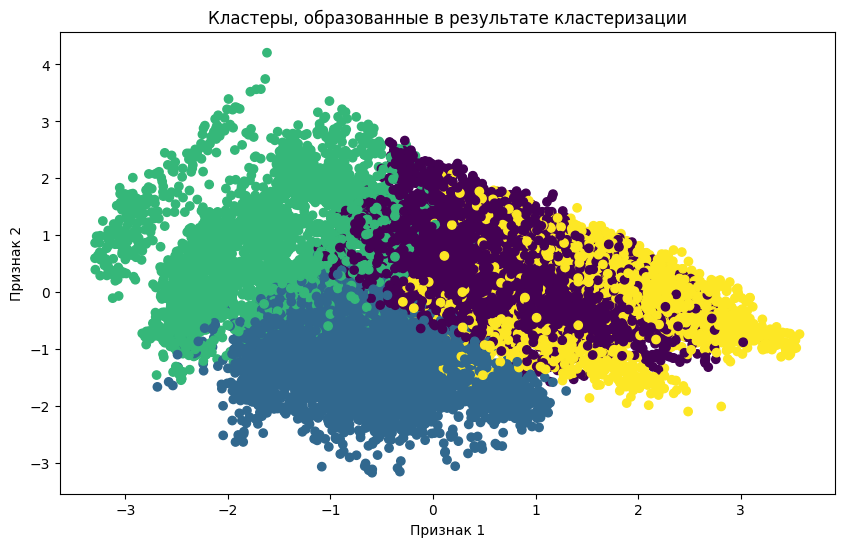

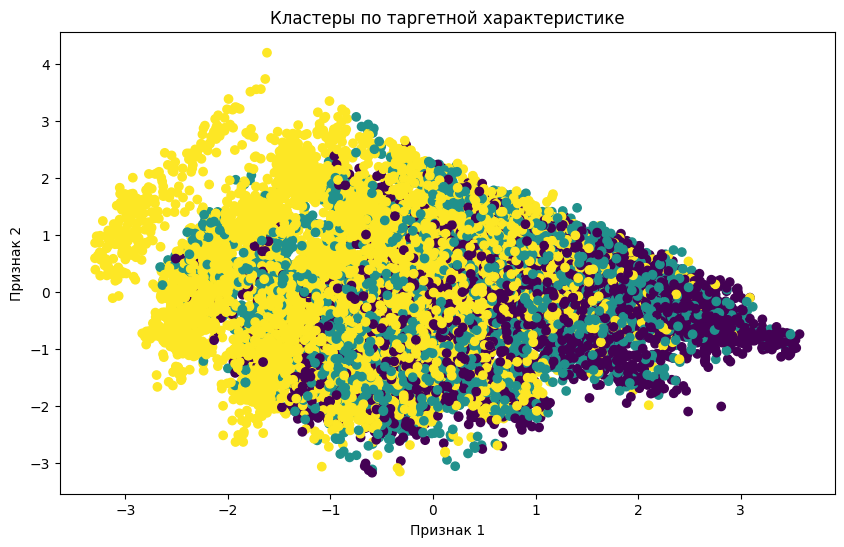

In [13]:
# Пример данных
X = data.drop(columns=['gap'])
y = gap_column_classes

# Кластеризация с помощью KMeans на 4 кластера
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

# График кластеров, образованных в результате работы алгоритма кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.title('Кластеры, образованные в результате кластеризации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# График кластеров по таргетной характеристике (для сравнения)
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='viridis')
plt.title('Кластеры по таргетной характеристике')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()